In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("history.csv")
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'], errors= "coerce")
df['Rain (1h)'] = df['Rain (1h)'].replace(np.nan, 0)
df

,TimeStamp,Temperature,Feels Like,Pressure,Humidity,Wind Speed,Cloud,Weather Description Main,Rain (1h)
0,2024-01-01 00:00:00,292.15,292.12,1017,77,1.77,74,Clouds,0.0
1,2024-01-01 01:00:00,293.15,293.14,1018,74,2.03,100,Clouds,0.0
2,2024-01-01 02:00:00,294.15,294.13,1019,70,2.24,100,Clouds,0.0
3,2024-01-01 03:00:00,297.15,297.36,1019,67,2.04,100,Clouds,0.0
4,2024-01-01 04:00:00,299.15,299.15,1018,63,2.01,100,Clouds,0.0
...,...,...,...,...,...,...,...,...,...
7429,2024-11-05 13:00:00,295.15,295.44,1020,78,2.13,100,Clouds,0.0
7430,2024-11-05 14:00:00,295.15,295.39,1020,76,2.09,100,Clouds,0.0
7431,2024-11-05 15:00:00,295.15,295.36,1020,75,2.03,100,Clouds,0.0
7432,2024-11-05 16:00:00,295.15,295.34,1020,74,1.96,100,Clouds,0.0


<h1 style = "color: yellow">Data Understanding</h1>

## General Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7434 entries, 0 to 7433
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeStamp                 7434 non-null   datetime64[ns]
 1   Temperature               7434 non-null   float64       
 2   Feels Like                7434 non-null   float64       
 3   Pressure                  7434 non-null   int64         
 4   Humidity                  7434 non-null   int64         
 5   Wind Speed                7434 non-null   float64       
 6   Cloud                     7434 non-null   int64         
 7   Weather Description Main  7434 non-null   object        
 8   Rain (1h)                 7434 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 522.8+ KB


In [6]:
df.describe()

,TimeStamp,Temperature,Feels Like,Pressure,Humidity,Wind Speed,Cloud,Rain (1h)
count,7434,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,2024-06-03 20:30:00,299.017616,301.473433,1008.922922,75.232176,2.874271,77.017622,0.385654
min,2024-01-01 00:00:00,281.150000,278.000000,982.000000,12.000000,0.040000,0.000000,0.000000
25%,2024-03-18 10:15:00,296.150000,296.757500,1004.000000,65.000000,1.790000,61.000000,0.000000
50%,2024-06-03 20:30:00,300.150000,302.010000,1008.000000,79.000000,2.620000,97.000000,0.000000
75%,2024-08-20 06:45:00,302.150000,307.460000,1014.000000,88.000000,3.760000,100.000000,0.000000
max,2024-11-05 17:00:00,313.150000,318.150000,1030.000000,99.000000,20.090000,100.000000,36.460000
std,NaN,5.478862,7.763139,6.955750,15.100459,1.544876,32.595426,1.538175


In [7]:
df.describe(include= "object")

,Weather Description Main
count,7434
unique,3
top,Clouds
freq,5509


<Axes: >

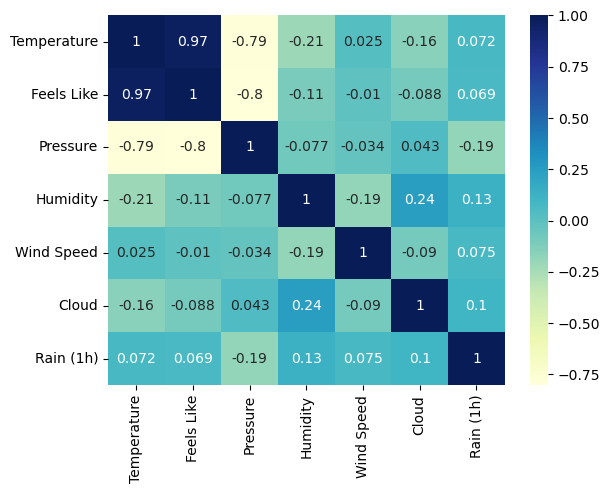

In [8]:
# print(sns.palettes.SEABORN_PALETTES.keys())
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), cmap = 'YlGnBu', annot= True)

In [9]:
# df.select_dtypes(include=["int64", "float64"]).corr().unstack().sort_values(by= )

corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()

# Unstack the matrix to turn it into a Series
corr_pairs = corr_matrix.unstack()

# Filter out self-correlations (correlation of variables with themselves)
filtered_corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort the correlations in descending order
sorted_corr = filtered_corr_pairs.sort_values(ascending=False).drop_duplicates()

# Display the sorted correlation pairs
# print(len(sorted_corr))
corrdf = pd.DataFrame()
corrdf["FirstAttr"] = sorted_corr.index.get_level_values(0)
corrdf["SecondAttr"] = sorted_corr.index.get_level_values(1)
corrdf["CorrValue"] = sorted_corr.values

corrdf


,FirstAttr,SecondAttr,CorrValue
0,Temperature,Feels Like,0.969794
1,Cloud,Humidity,0.242714
2,Humidity,Rain (1h),0.133480
3,Cloud,Rain (1h),0.104668
4,Rain (1h),Wind Speed,0.074833
5,Rain (1h),Temperature,0.072473
6,Feels Like,Rain (1h),0.068789
7,Cloud,Pressure,0.043461
8,Temperature,Wind Speed,0.025221
9,Wind Speed,Feels Like,-0.010400


In [10]:
corrdf[(corrdf["FirstAttr"] == "Temperature") | (corrdf["SecondAttr"] == "Temperature")]


,FirstAttr,SecondAttr,CorrValue
0,Temperature,Feels Like,0.969794
5,Rain (1h),Temperature,0.072473
8,Temperature,Wind Speed,0.025221
15,Cloud,Temperature,-0.158109
18,Temperature,Humidity,-0.213560
19,Pressure,Temperature,-0.793503


## Basic Visualization

In [11]:
df_copy = df.copy()
df_copy["Date"] = df_copy["TimeStamp"].dt.date

dailyAvg = df_copy.groupby(by= "Date")[['Temperature', 'Feels Like', 'Pressure', 'Humidity', 'Wind Speed',
       'Cloud', 'Rain (1h)']].mean().reset_index()
dailyAvg['Date'] = pd.to_datetime(dailyAvg["Date"], errors= "coerce")
print(dailyAvg.info())
dailyAvg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         310 non-null    datetime64[ns]
 1   Temperature  310 non-null    float64       
 2   Feels Like   310 non-null    float64       
 3   Pressure     310 non-null    float64       
 4   Humidity     310 non-null    float64       
 5   Wind Speed   310 non-null    float64       
 6   Cloud        310 non-null    float64       
 7   Rain (1h)    310 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 19.5 KB
None


,Date,Temperature,Feels Like,Pressure,Humidity,Wind Speed,Cloud,Rain (1h)
0,2024-01-01,296.358333,296.727917,1016.125000,73.625000,2.798333,78.416667,0.000000
1,2024-01-02,296.441667,296.897500,1015.708333,76.958333,4.042083,59.416667,0.000000
2,2024-01-03,291.858333,291.549167,1019.708333,67.541667,3.001250,99.083333,0.000000
3,2024-01-04,292.775000,292.622500,1017.666667,70.083333,2.800000,93.541667,0.000000
4,2024-01-05,293.733333,293.782500,1017.333333,74.083333,2.673750,99.458333,0.000000
...,...,...,...,...,...,...,...,...
305,2024-11-01,300.108333,299.515417,1013.541667,42.458333,3.560833,37.166667,0.000000
306,2024-11-02,298.775000,298.288750,1017.125000,47.333333,3.462083,11.875000,0.000000
307,2024-11-03,298.108333,298.188333,1016.166667,55.958333,2.247500,47.708333,0.261667
308,2024-11-04,298.233333,298.443750,1017.416667,58.416667,3.360417,93.041667,0.462083


Index(['Temperature', 'Feels Like', 'Pressure', 'Humidity', 'Wind Speed',
       'Cloud', 'Rain (1h)'],
      dtype='object')


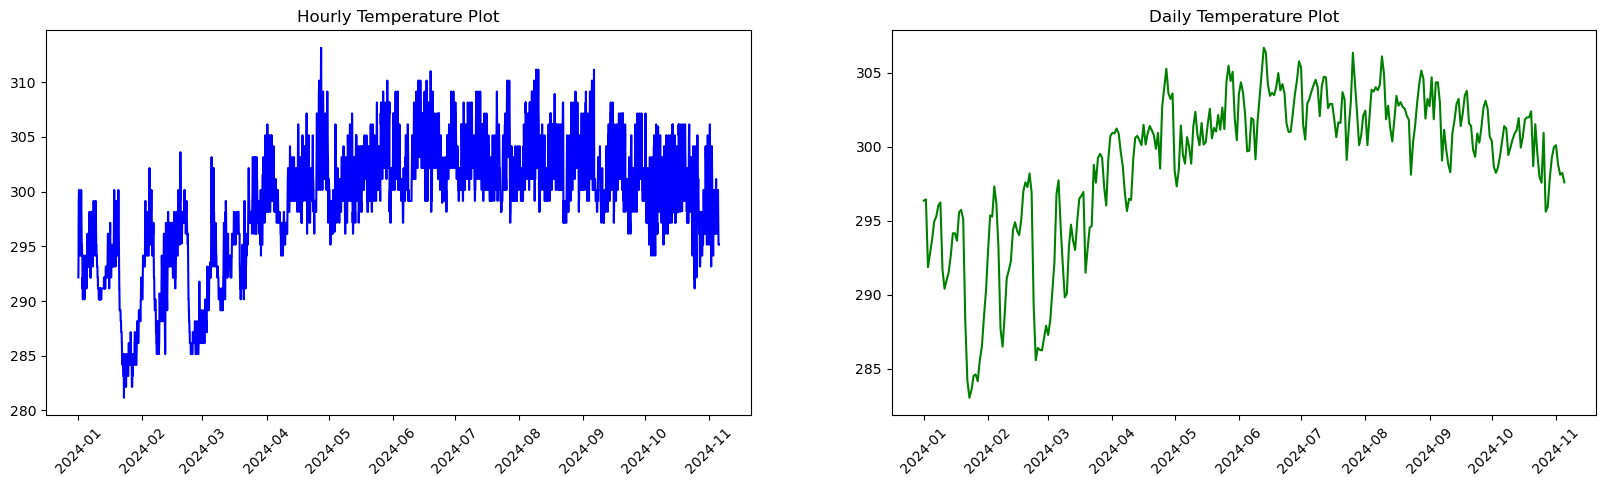

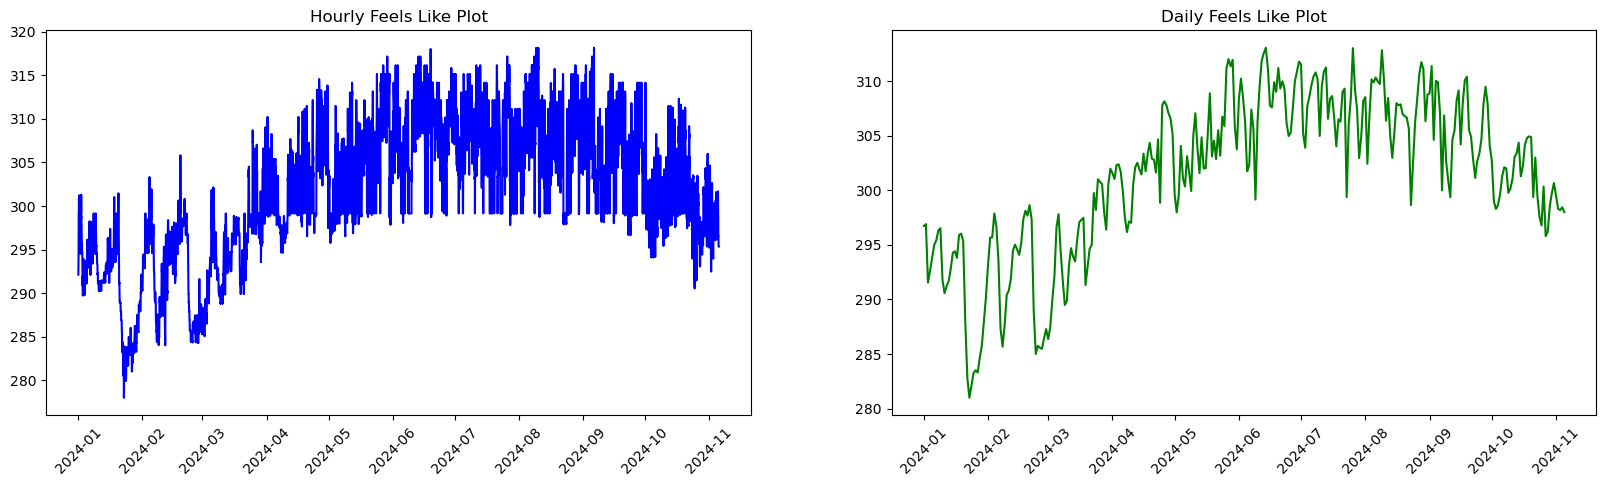

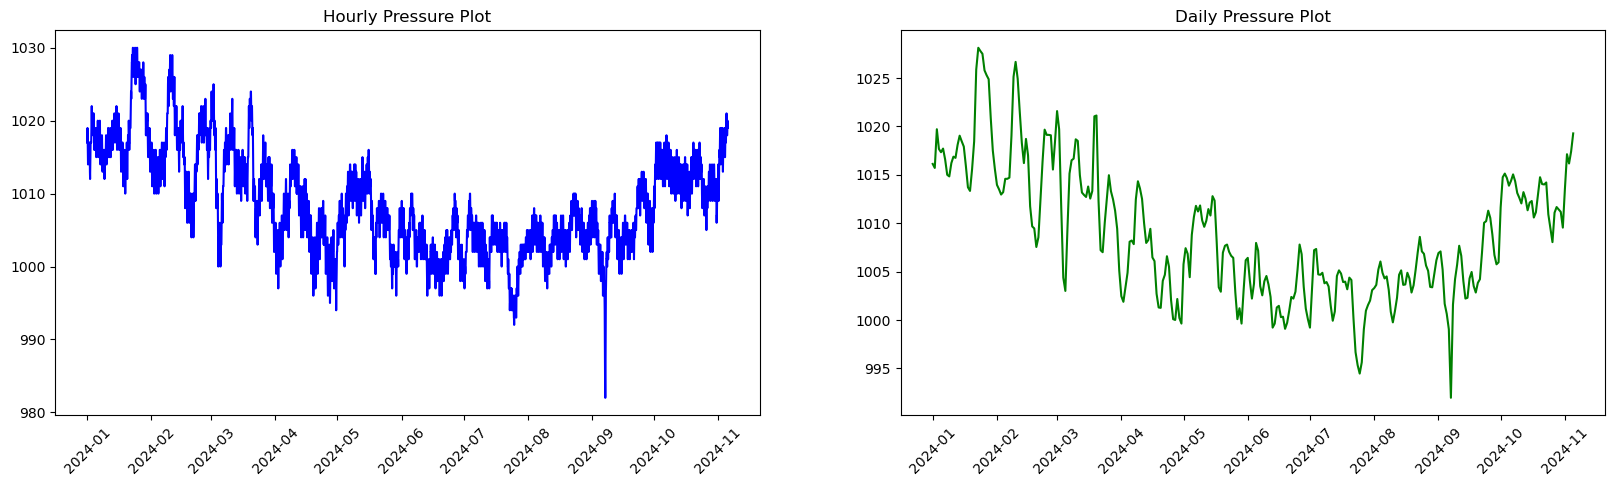

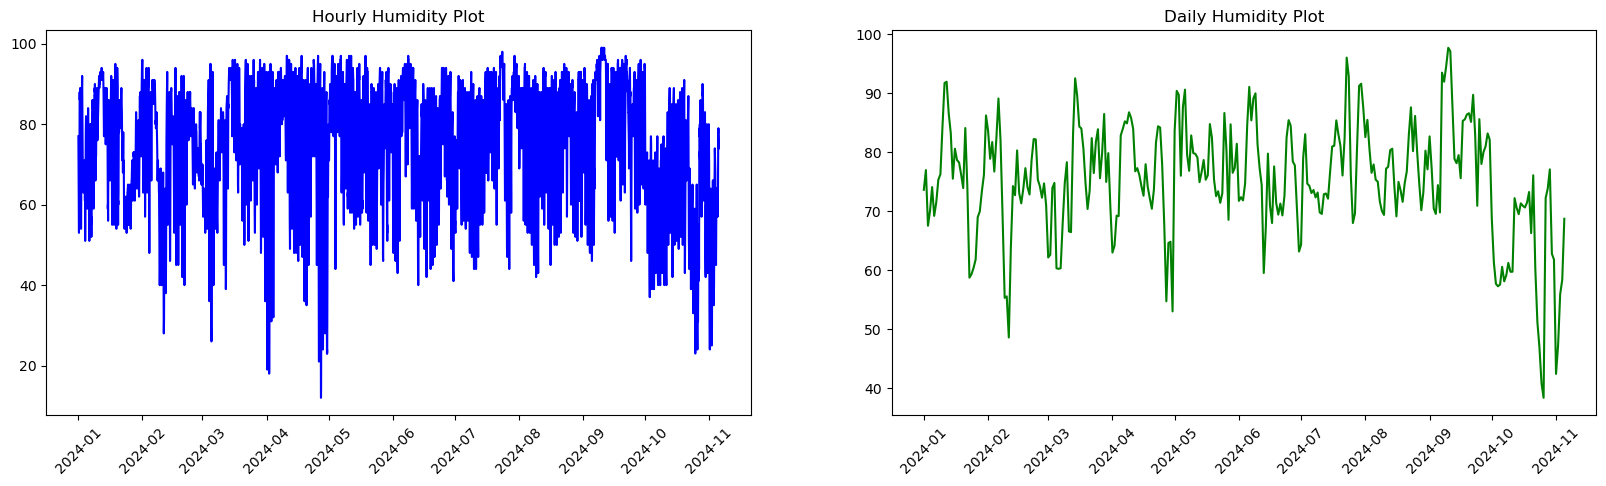

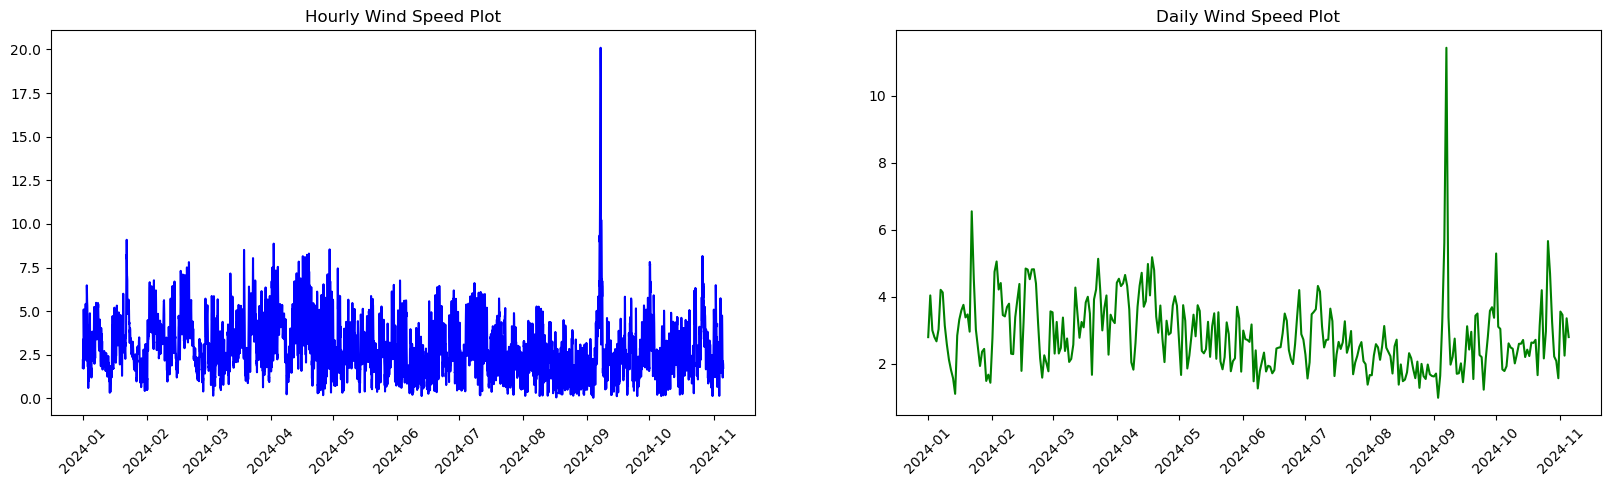

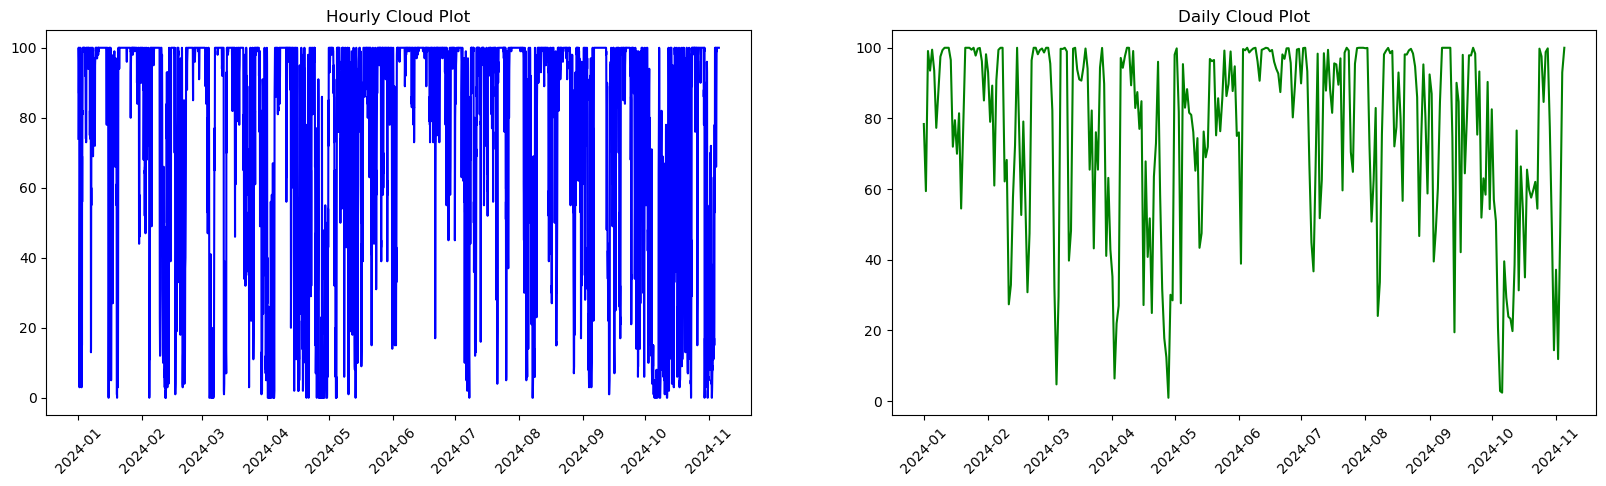

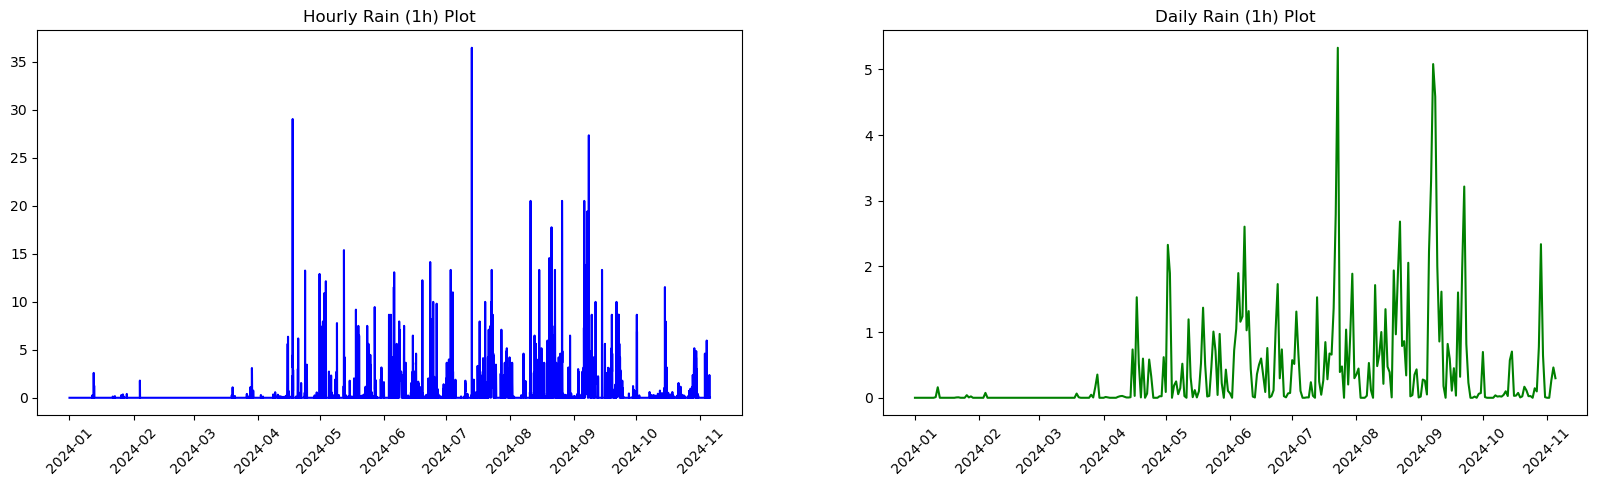

In [12]:
columns = df.drop(columns=["TimeStamp", "Weather Description Main"]).columns
print(columns)

for col in columns:
    fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize = (20, 5))

    ax = ax.flatten()

    ax[0].plot(df["TimeStamp"], df[col], color = "blue")
    ax[0].set_title(f"Hourly {col} Plot")
    ax[0].tick_params(axis='x', rotation=45)
    # ax[0].set_xticks(df["TimeStamp"])
    # ax[0].set_xticklabels(df["TimeStamp"], rotation = 45)

    ax[1].plot(dailyAvg["Date"], dailyAvg[col], color = "green")
    ax[1].set_title(f"Daily {col} Plot")
    ax[1].tick_params(axis='x', rotation=45)

    plt.show()


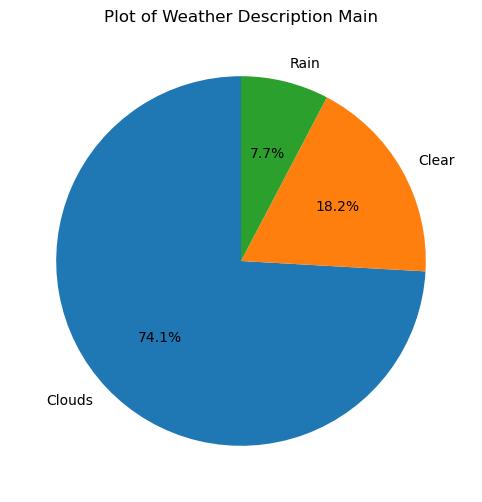

In [13]:
descriptionPercentage = df['Weather Description Main'].value_counts() / df['Weather Description Main'].value_counts().sum() * 100
labels = df['Weather Description Main'].unique()

plt.figure(figsize=(8,6))
plt.pie(descriptionPercentage, labels = labels, autopct = "%1.1f%%", startangle = 90)
plt.title(f"Plot of Weather Description Main")

plt.show()

<h3 style = "color: green">Visual Chart of Most Correlated Attribute (abs(corr_value) > 0.5)</h3>

<p style = "color: lightblue">Temperature vs Feels Like</p>

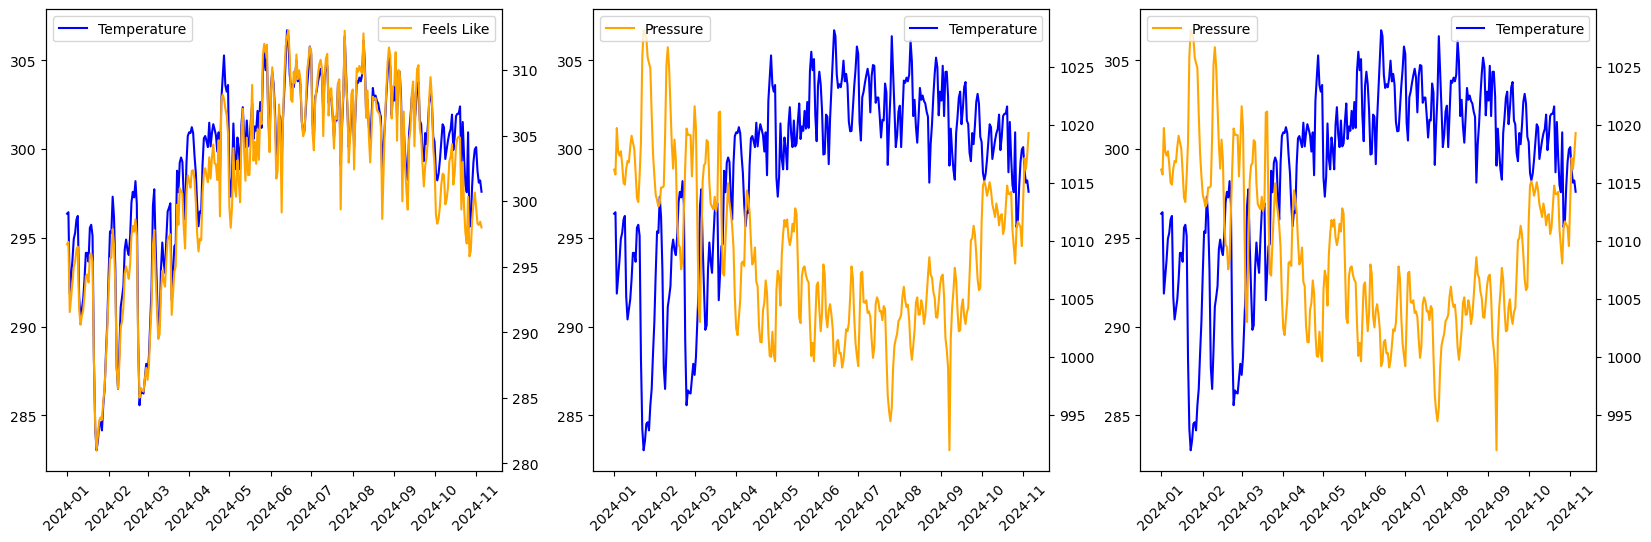

In [14]:
fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize = (20,6))

ax[0].plot(dailyAvg["Date"], dailyAvg["Temperature"], color = "blue", label = "Temperature")

ax_twin = ax[0].twinx()

ax_twin.plot(dailyAvg["Date"], dailyAvg["Feels Like"], color = "orange", label = "Feels Like")

ax[0].legend(loc = "upper left")
ax_twin.legend(loc = "upper right")

# Rotate x-axis labels
for label in ax[0].get_xticklabels():
    label.set_rotation(45)

ax[1].plot(dailyAvg["Date"], dailyAvg["Temperature"], color = "blue", label = "Temperature")

ax_twin1 = ax[1].twinx()

ax_twin1.plot(dailyAvg["Date"], dailyAvg["Pressure"], color = "orange", label = "Pressure")

ax[1].legend(loc = "upper right")
ax_twin1.legend(loc = "upper left")

# Rotate x-axis labels
for label in ax[1].get_xticklabels():
    label.set_rotation(45)
    
ax[2].plot(dailyAvg["Date"], dailyAvg["Temperature"], color = "blue", label = "Temperature")

ax_twin2 = ax[2].twinx()

ax_twin2.plot(dailyAvg["Date"], dailyAvg["Pressure"], color = "orange", label = "Pressure")

ax[2].legend(loc = "upper right")
ax_twin2.legend(loc = "upper left")

# Rotate x-axis labels
for label in ax[2].get_xticklabels():
    label.set_rotation(45)

plt.show()

<p style = "color: lightblue">Temperature vs Pressure</p>

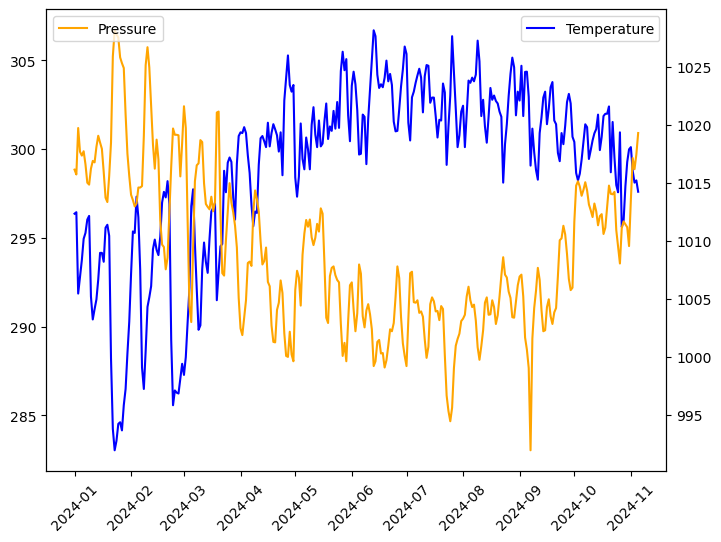

In [15]:
fig, ax = plt.subplots(figsize = (8,6))

ax.plot(dailyAvg["Date"], dailyAvg["Temperature"], color = "blue", label = "Temperature")

ax_twin = ax.twinx()

ax_twin.plot(dailyAvg["Date"], dailyAvg["Pressure"], color = "orange", label = "Pressure")

ax.legend(loc = "upper right")
ax_twin.legend(loc = "upper left")

# Rotate x-axis labels
for label in ax.get_xticklabels():
    label.set_rotation(45)
    
plt.show()

<p style = "color: lightblue">Pressure vs Feels Like</p>

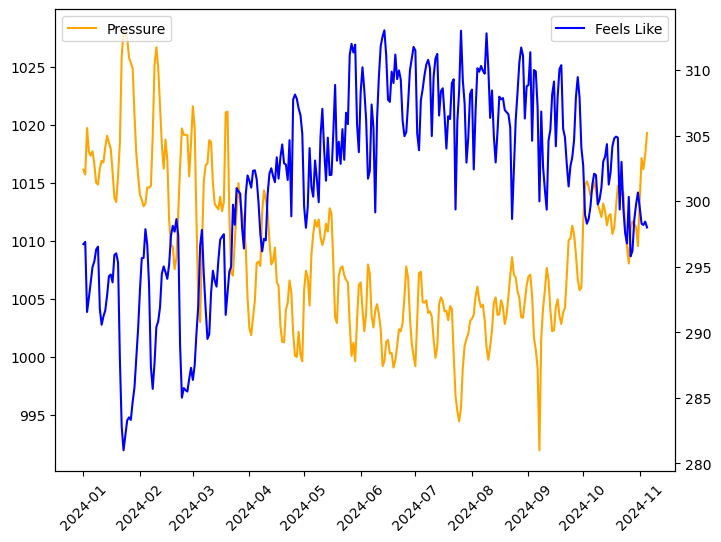

In [16]:
fig, ax = plt.subplots(figsize = (8,6))

line1 = ax.plot(dailyAvg["Date"], dailyAvg["Pressure"], color = "orange", label = "Pressure")

ax_twin = ax.twinx()

line2 = ax_twin.plot(dailyAvg["Date"], dailyAvg["Feels Like"], color = "blue", label = "Feels Like")

ax.legend(loc = "upper left")
ax_twin.legend(loc = "upper right")

# Rotate x-axis labels
for label in ax.get_xticklabels():
    label.set_rotation(45)
    
plt.show()


## Time Series Decomposition

In [17]:
df_decompose = df.drop(columns="Weather Description Main")
df_decompose = df_decompose.set_index('TimeStamp')
print(df_decompose.info())
df_decompose

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7434 entries, 2024-01-01 00:00:00 to 2024-11-05 17:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  7434 non-null   float64
 1   Feels Like   7434 non-null   float64
 2   Pressure     7434 non-null   int64  
 3   Humidity     7434 non-null   int64  
 4   Wind Speed   7434 non-null   float64
 5   Cloud        7434 non-null   int64  
 6   Rain (1h)    7434 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 464.6 KB
None


,Temperature,Feels Like,Pressure,Humidity,Wind Speed,Cloud,Rain (1h)
TimeStamp,,,,,,,
2024-01-01 00:00:00,292.15,292.12,1017,77,1.77,74,0.0
2024-01-01 01:00:00,293.15,293.14,1018,74,2.03,100,0.0
2024-01-01 02:00:00,294.15,294.13,1019,70,2.24,100,0.0
2024-01-01 03:00:00,297.15,297.36,1019,67,2.04,100,0.0
2024-01-01 04:00:00,299.15,299.15,1018,63,2.01,100,0.0
...,...,...,...,...,...,...,...
2024-11-05 13:00:00,295.15,295.44,1020,78,2.13,100,0.0
2024-11-05 14:00:00,295.15,295.39,1020,76,2.09,100,0.0
2024-11-05 15:00:00,295.15,295.36,1020,75,2.03,100,0.0


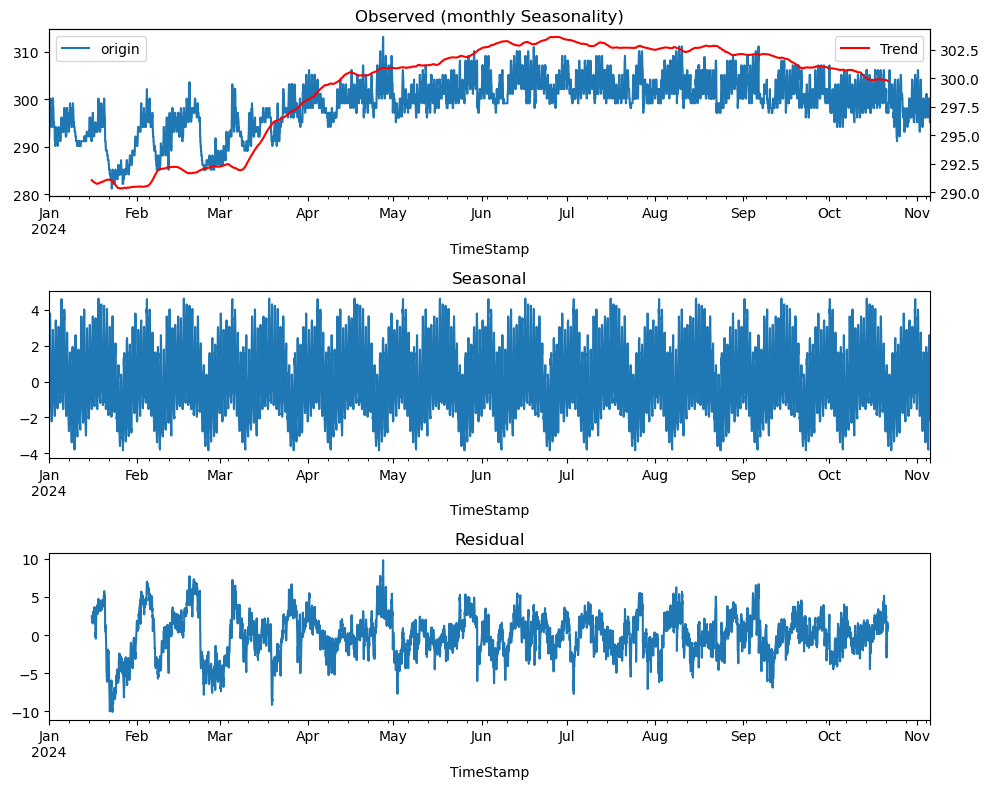

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decompose = df_decompose.asfreq("h")

# Select the target column for decomposition (e.g., Temperature)
target_col = 'Temperature'

# # Perform decomposition for daily seasonality (24-hour period)
# decomposition_daily = seasonal_decompose(df_decompose[target_col], model='additive', period=24)
# fig, ax = plt.subplots(4, 1, figsize=(10, 8))
# decomposition_daily.observed.plot(ax=ax[0], title='Observed (Daily Seasonality)')
# decomposition_daily.trend.plot(ax=ax[1], title='Trend', color= "red")
# decomposition_daily.seasonal.plot(ax=ax[2], title='Seasonal')
# decomposition_daily.resid.plot(ax=ax[3], title='Residual')
# plt.tight_layout()
# plt.show()


# # Perform decomposition for weekly seasonality (168-hour period)
# decomposition_weekly = seasonal_decompose(df_decompose[target_col], model='additive', period= 24 *14)
# fig, ax = plt.subplots(4, 1, figsize=(10, 8))
# decomposition_weekly.observed.plot(ax=ax[0], title='Observed (Weekly Seasonality)')
# decomposition_weekly.trend.plot(ax=ax[1], title='Trend')
# decomposition_weekly.seasonal.plot(ax=ax[2], title='Seasonal')
# decomposition_weekly.resid.plot(ax=ax[3], title='Residual')
# plt.tight_layout()
# plt.show()

# Perform decomposition for weekly seasonality (168-hour period)
decomposition_weekly = seasonal_decompose(df_decompose[target_col], model='additive', period= 24 * 30)
fig, ax = plt.subplots(3, 1, figsize=(10, 8))
decomposition_weekly.observed.plot(ax=ax[0], title='Observed (monthly Seasonality)', label = "origin")
ax[0].legend(loc= "upper left")
ax_twin = ax[0].twinx()
decomposition_weekly.trend.plot(ax=ax_twin, color = "red", label = "Trend")
ax_twin.legend(loc = "upper right")
decomposition_weekly.seasonal.plot(ax=ax[1], title='Seasonal')
decomposition_weekly.resid.plot(ax=ax[2], title='Residual')
plt.tight_layout()
plt.show()

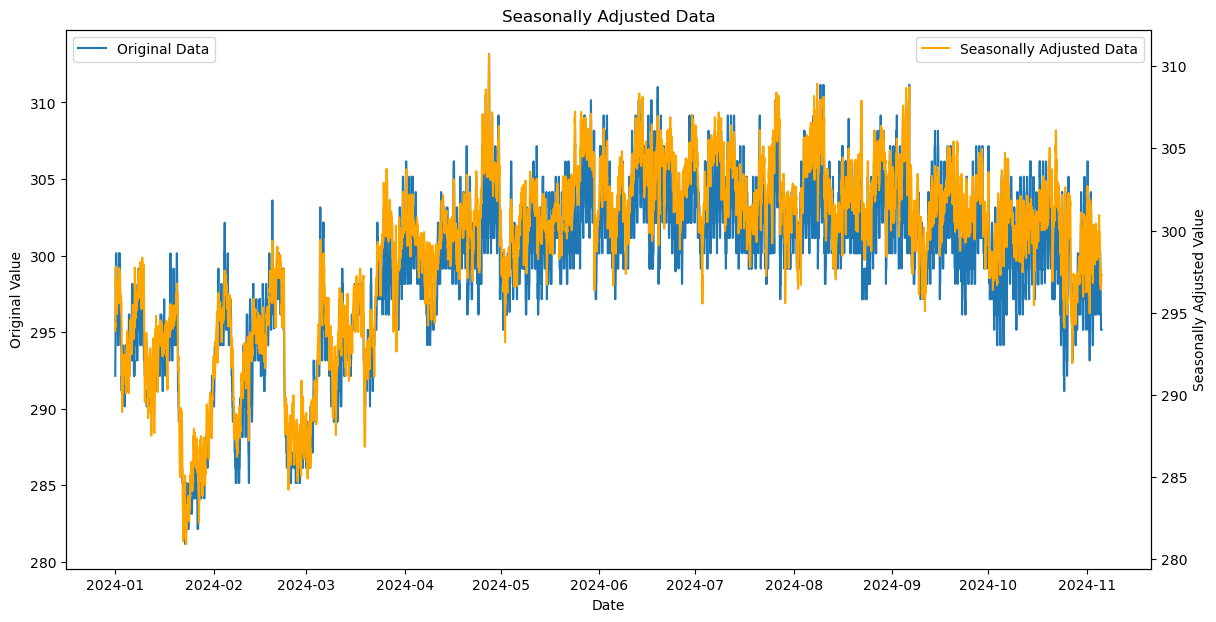

In [19]:
# Decompose the time series
decomposition = seasonal_decompose(df_decompose[target_col], model='additive', period=24*30)  # Adjust period as needed

# Calculate seasonally adjusted data
seasonally_adjusted = df_decompose[target_col] - decomposition.seasonal

# Plot the original and seasonally adjusted data
fig, ax = plt.subplots(figsize=(14, 7))

# Plot original data on primary y-axis
ax.plot(df_decompose.index, df_decompose[target_col], label='Original Data')
ax.set_xlabel('Date')
ax.set_ylabel('Original Value')
ax.legend(loc='upper left')

# Plot seasonally adjusted data on secondary y-axis
ax2 = ax.twinx()
ax2.plot(df_decompose.index, seasonally_adjusted, label='Seasonally Adjusted Data', color='orange')
ax2.set_ylabel('Seasonally Adjusted Value')
ax2.legend(loc='upper right')

# Set the title
plt.title('Seasonally Adjusted Data')
plt.show()


## Stationary

<h3 style = "color: green">ADF (Augmented Dickey-Fuller) Test</h3>

In [20]:
df_stationary = df_decompose
df_stationary

,Temperature,Feels Like,Pressure,Humidity,Wind Speed,Cloud,Rain (1h)
TimeStamp,,,,,,,
2024-01-01 00:00:00,292.15,292.12,1017,77,1.77,74,0.0
2024-01-01 01:00:00,293.15,293.14,1018,74,2.03,100,0.0
2024-01-01 02:00:00,294.15,294.13,1019,70,2.24,100,0.0
2024-01-01 03:00:00,297.15,297.36,1019,67,2.04,100,0.0
2024-01-01 04:00:00,299.15,299.15,1018,63,2.01,100,0.0
...,...,...,...,...,...,...,...
2024-11-05 13:00:00,295.15,295.44,1020,78,2.13,100,0.0
2024-11-05 14:00:00,295.15,295.39,1020,76,2.09,100,0.0
2024-11-05 15:00:00,295.15,295.36,1020,75,2.03,100,0.0


In [21]:
from statsmodels.tsa.stattools import adfuller
from termcolor import colored

# df_stationary = df_stationary.asfreq("h")

columns = df_stationary.columns
for col in columns:
    print(f"ADF test of {col}")
    result = adfuller(df_stationary[col])  # replace with your data column
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

    # if result[1] < 0.05:
        # print(colored("Time series date of this attribute seems to be stationary \n", "red"))
    # print("\n")


ADF test of Temperature
ADF Statistic: -3.7809211579671693
p-value: 0.003108660725487825
ADF test of Feels Like
ADF Statistic: -4.02327971718228
p-value: 0.0012933994606193018
ADF test of Pressure
ADF Statistic: -4.2403989620080225
p-value: 0.0005624890395514724
ADF test of Humidity
ADF Statistic: -7.743804649829129
p-value: 1.0448620136530233e-11
ADF test of Wind Speed
ADF Statistic: -10.346047034823723
p-value: 2.6094296799818885e-18
ADF test of Cloud
ADF Statistic: -8.553475420002645
p-value: 9.090405644324831e-14
ADF test of Rain (1h)
ADF Statistic: -8.295767219063492
p-value: 4.1442867305220875e-13


## Autocorrelation

In [22]:
df_autocorrelation = df_stationary
df_autocorrelation

,Temperature,Feels Like,Pressure,Humidity,Wind Speed,Cloud,Rain (1h)
TimeStamp,,,,,,,
2024-01-01 00:00:00,292.15,292.12,1017,77,1.77,74,0.0
2024-01-01 01:00:00,293.15,293.14,1018,74,2.03,100,0.0
2024-01-01 02:00:00,294.15,294.13,1019,70,2.24,100,0.0
2024-01-01 03:00:00,297.15,297.36,1019,67,2.04,100,0.0
2024-01-01 04:00:00,299.15,299.15,1018,63,2.01,100,0.0
...,...,...,...,...,...,...,...
2024-11-05 13:00:00,295.15,295.44,1020,78,2.13,100,0.0
2024-11-05 14:00:00,295.15,295.39,1020,76,2.09,100,0.0
2024-11-05 15:00:00,295.15,295.36,1020,75,2.03,100,0.0


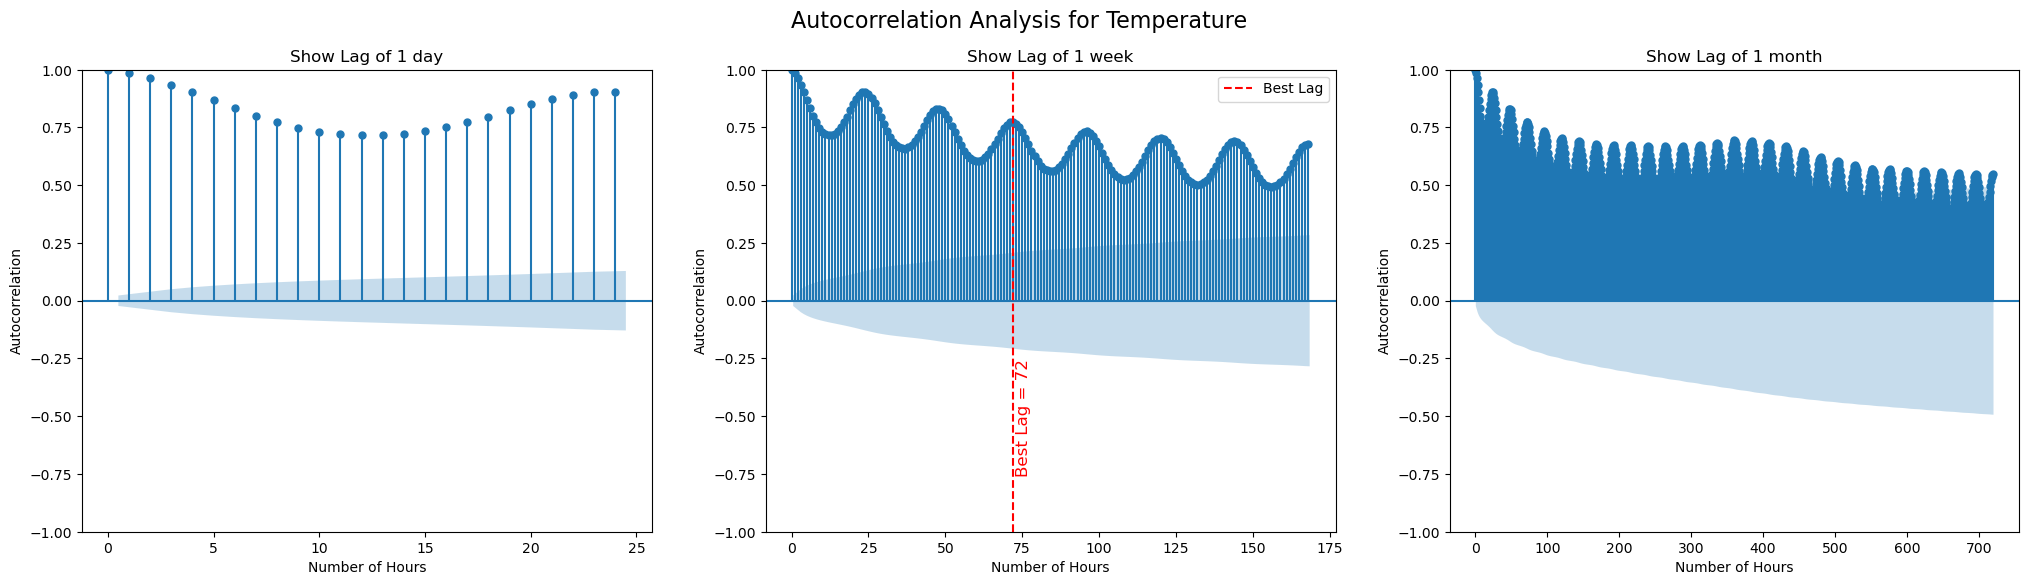

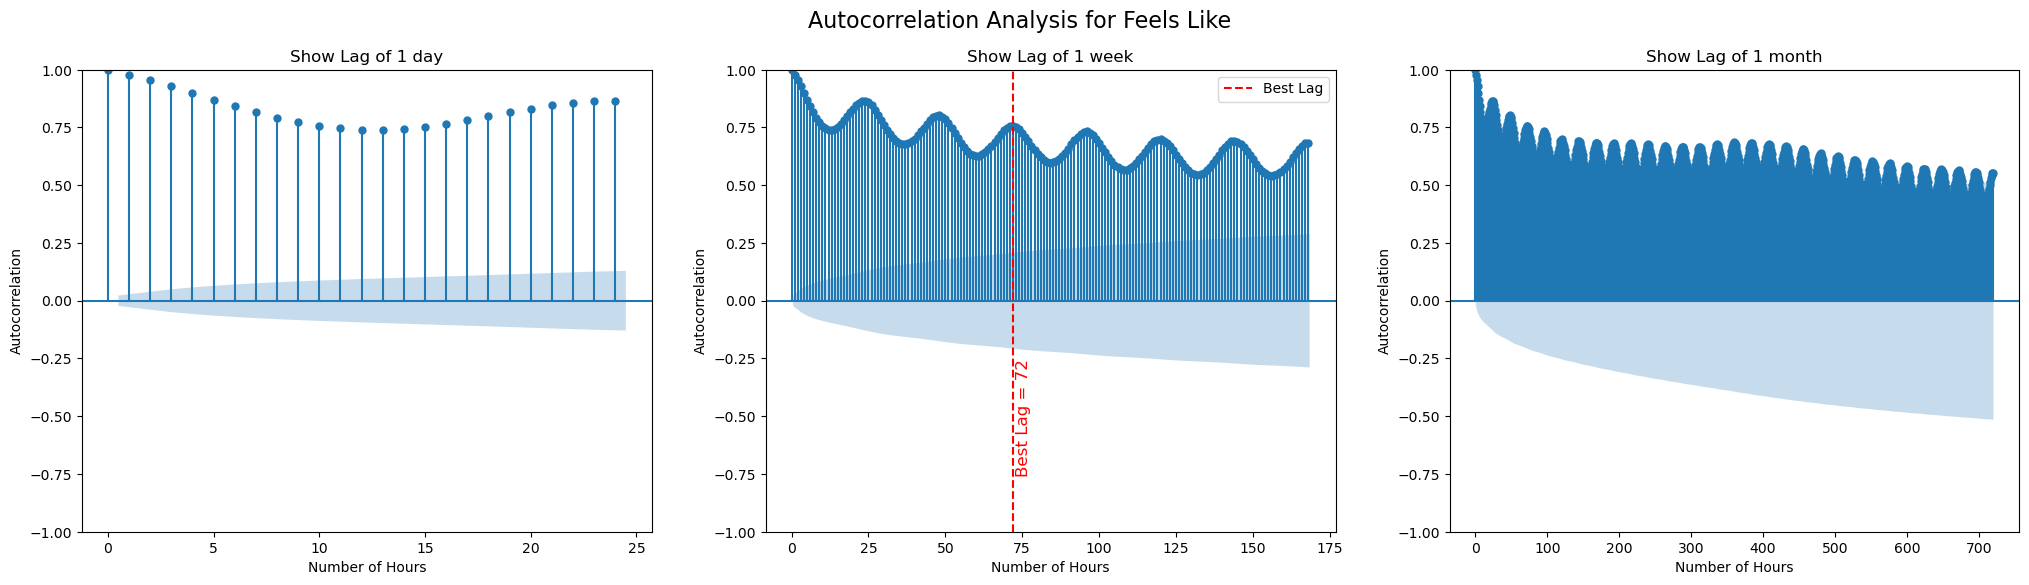

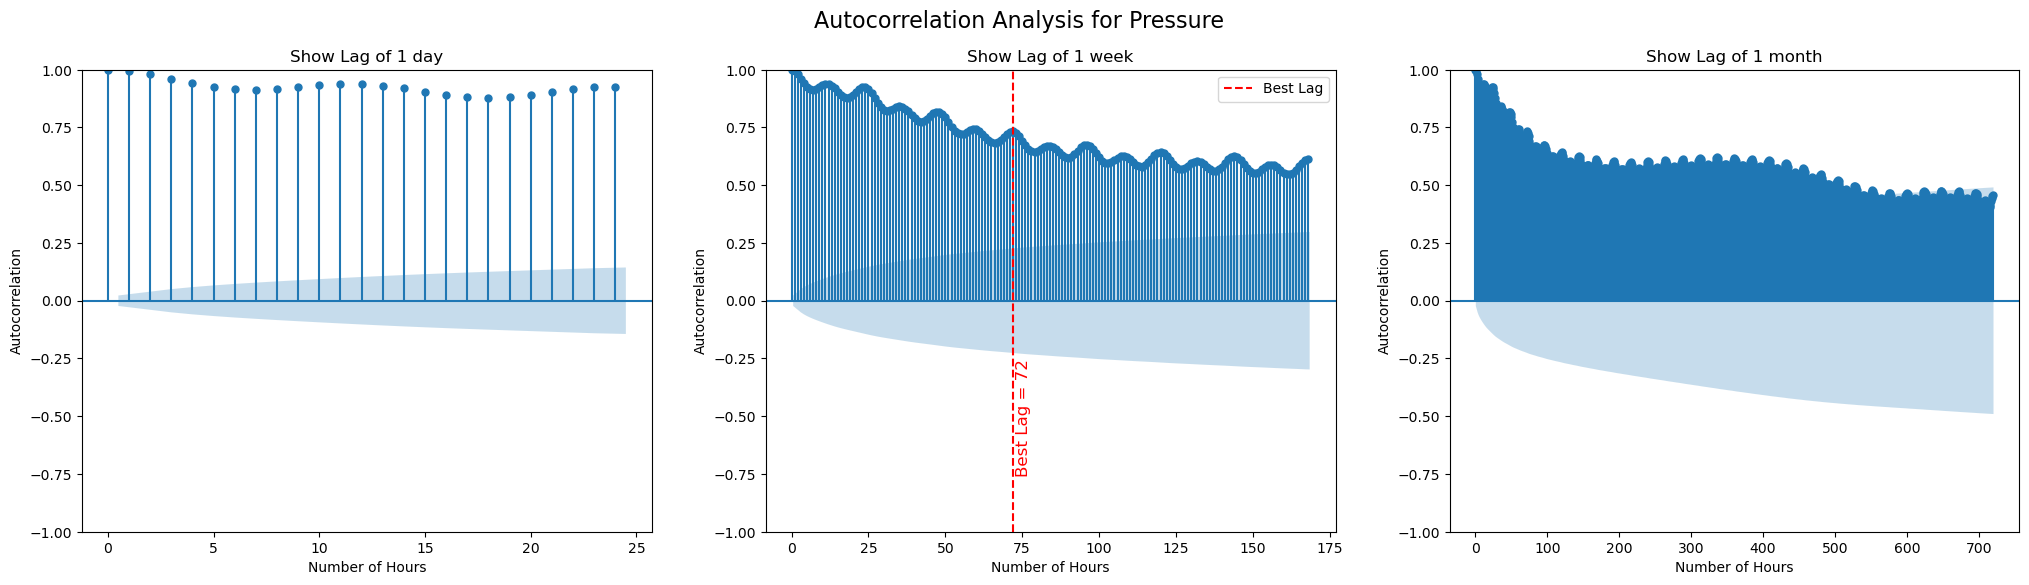

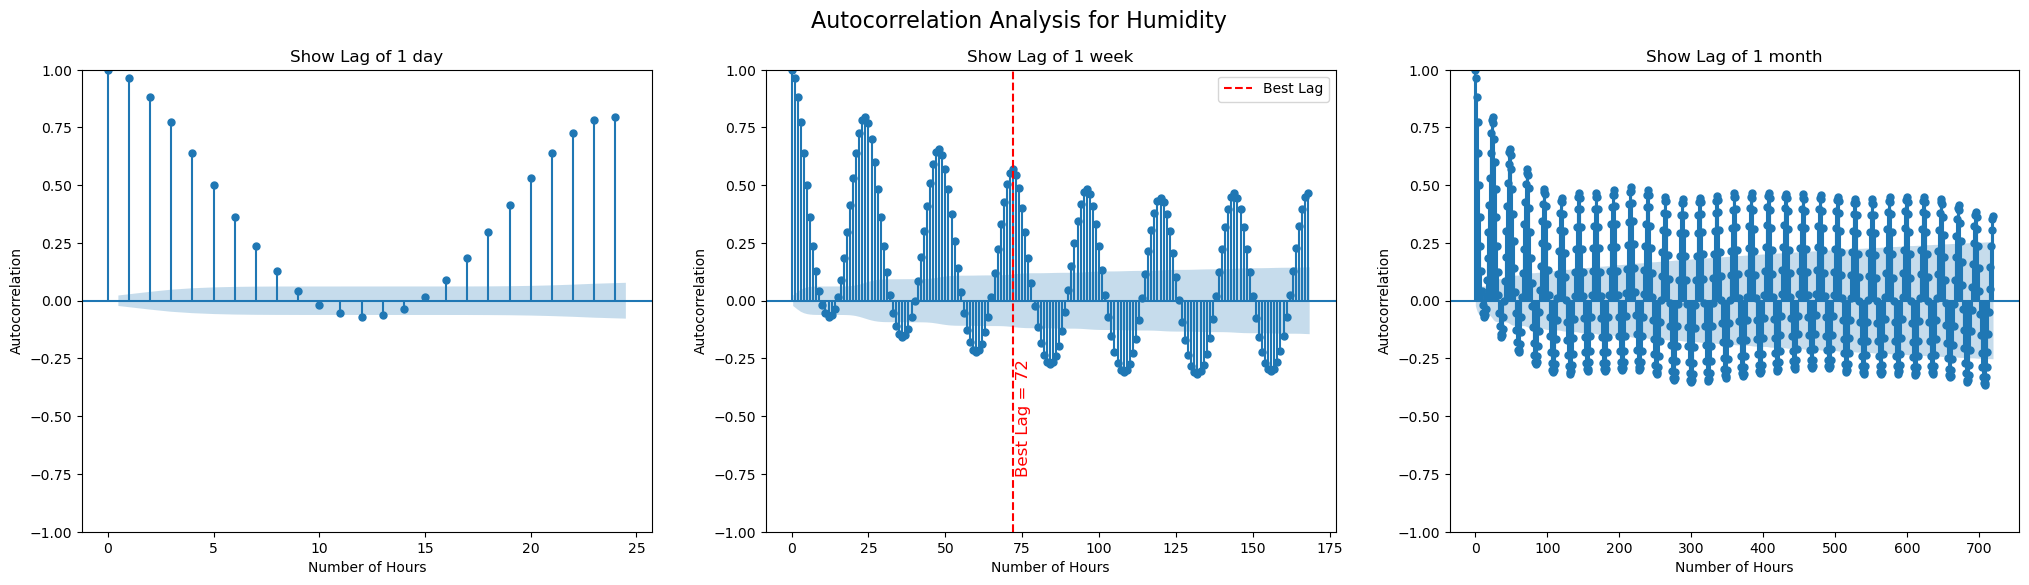

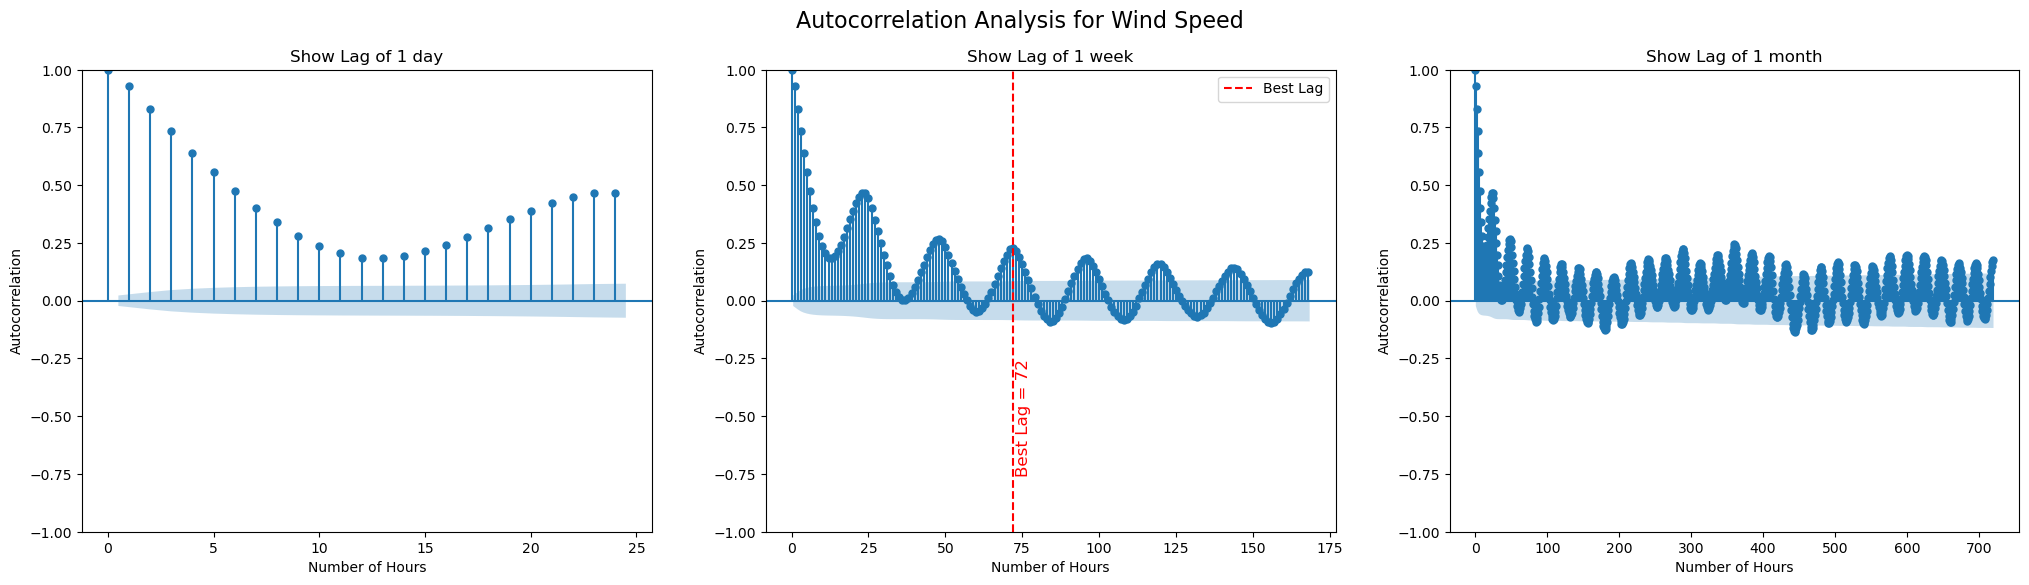

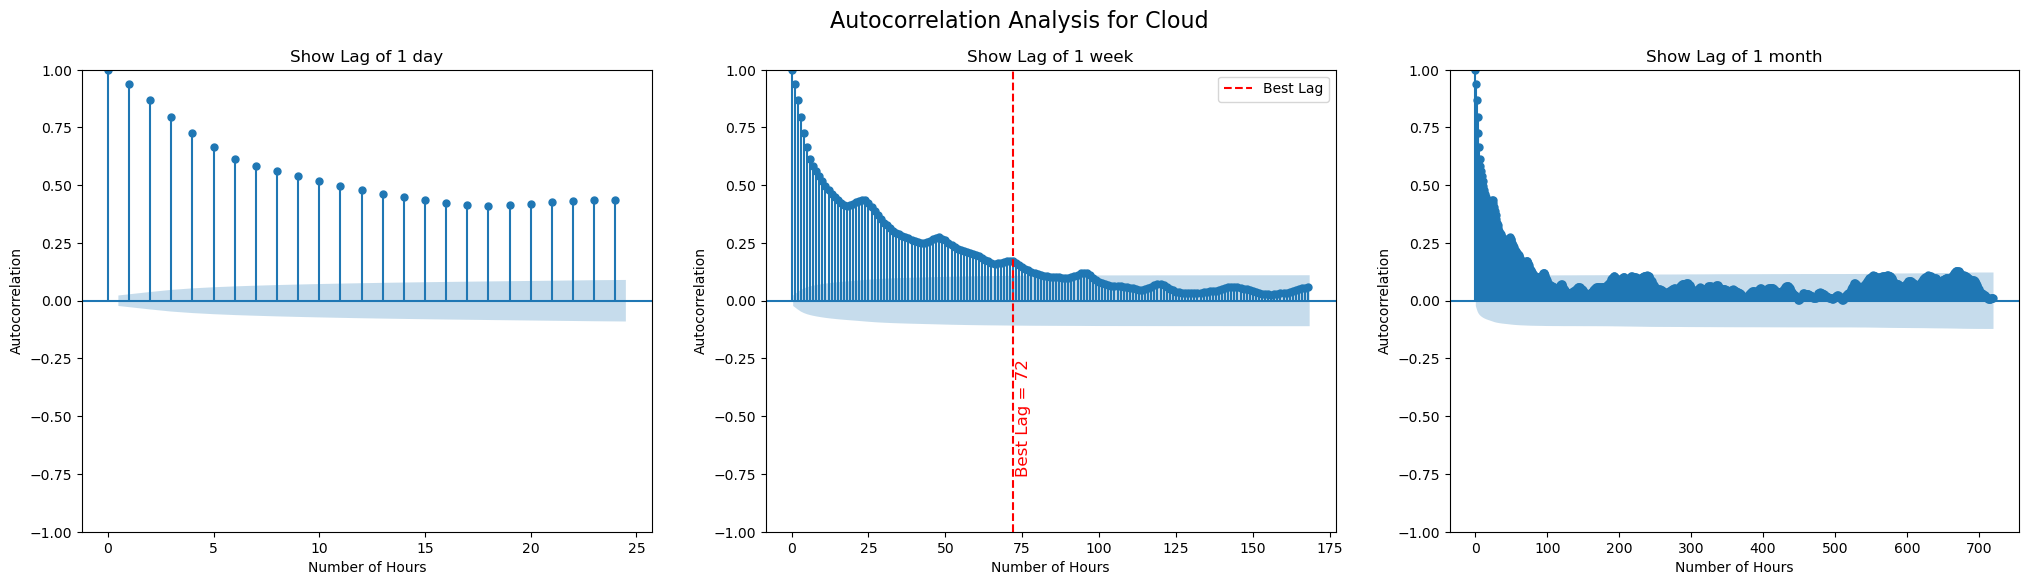

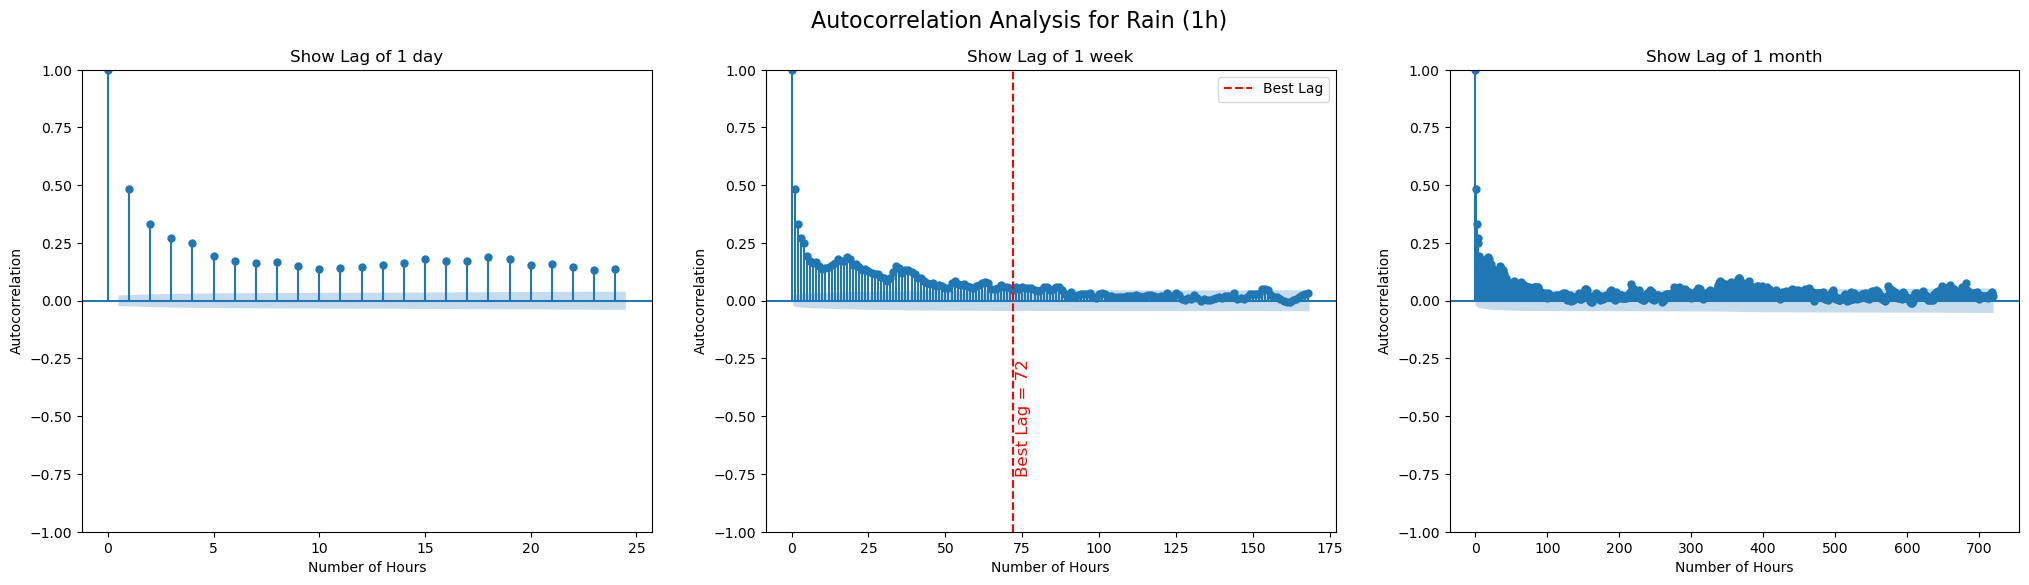

In [23]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# df_autocorrelation = df_autocorrelation.asfreq("h")

for col in df_autocorrelation.columns:
    fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize= (25, 6))

    fig.suptitle(f"Autocorrelation Analysis for {col}", fontsize=16)
    
    plot_acf(df_autocorrelation[col], lags = 24, ax= ax[0]) # Lags within 24 hours
    ax[0].set_title("Show Lag of 1 day")

    plot_acf(df_autocorrelation[col], lags = 24*7, ax= ax[1]) # Lags within a week
    ax[1].set_title("Show Lag of 1 week")
    ax[1].axvline(x=72, color='red', linestyle='--', label=f'Best Lag')
    ax[1].legend()

    # acf_values = acf(df_autocorrelation[col], nlags=24*7)
    ax[1].text(73, -0.75, f'Best Lag = 72', color='red', fontsize=12, ha='left', rotation = 90)  # Adjust positioning

    plot_acf(df_autocorrelation[col], lags = 24*30, ax= ax[2]) # Lags within a month
    ax[2].set_title("Show Lag of 1 month")

    for i in range(3):
        ax[i].set_xlabel("Number of Hours")
        ax[i].set_ylabel("Autocorrelation")
plt.show()

## Partial Autocorrelation

In [24]:
df_pacf = df_stationary
df_pacf

,Temperature,Feels Like,Pressure,Humidity,Wind Speed,Cloud,Rain (1h)
TimeStamp,,,,,,,
2024-01-01 00:00:00,292.15,292.12,1017,77,1.77,74,0.0
2024-01-01 01:00:00,293.15,293.14,1018,74,2.03,100,0.0
2024-01-01 02:00:00,294.15,294.13,1019,70,2.24,100,0.0
2024-01-01 03:00:00,297.15,297.36,1019,67,2.04,100,0.0
2024-01-01 04:00:00,299.15,299.15,1018,63,2.01,100,0.0
...,...,...,...,...,...,...,...
2024-11-05 13:00:00,295.15,295.44,1020,78,2.13,100,0.0
2024-11-05 14:00:00,295.15,295.39,1020,76,2.09,100,0.0
2024-11-05 15:00:00,295.15,295.36,1020,75,2.03,100,0.0


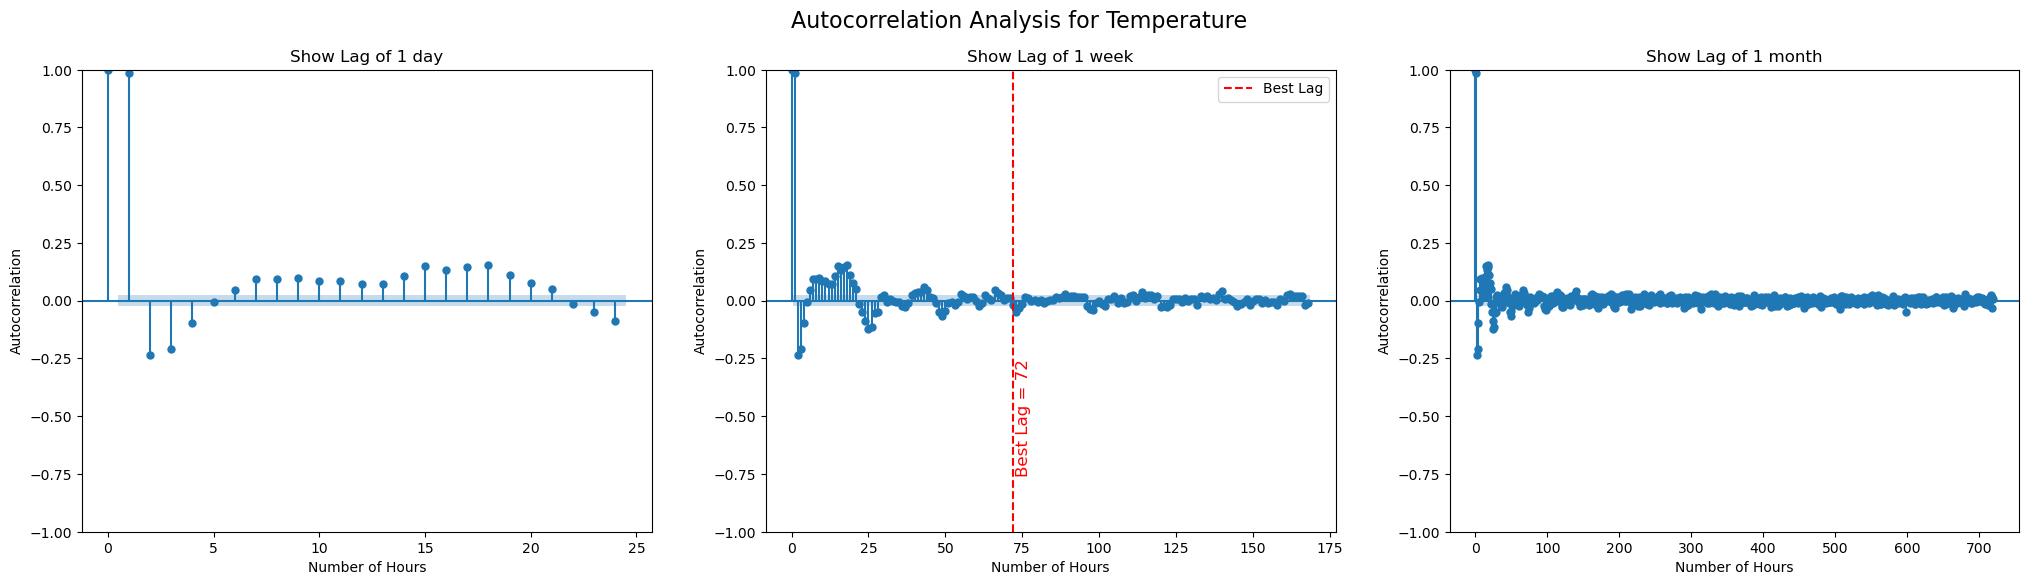

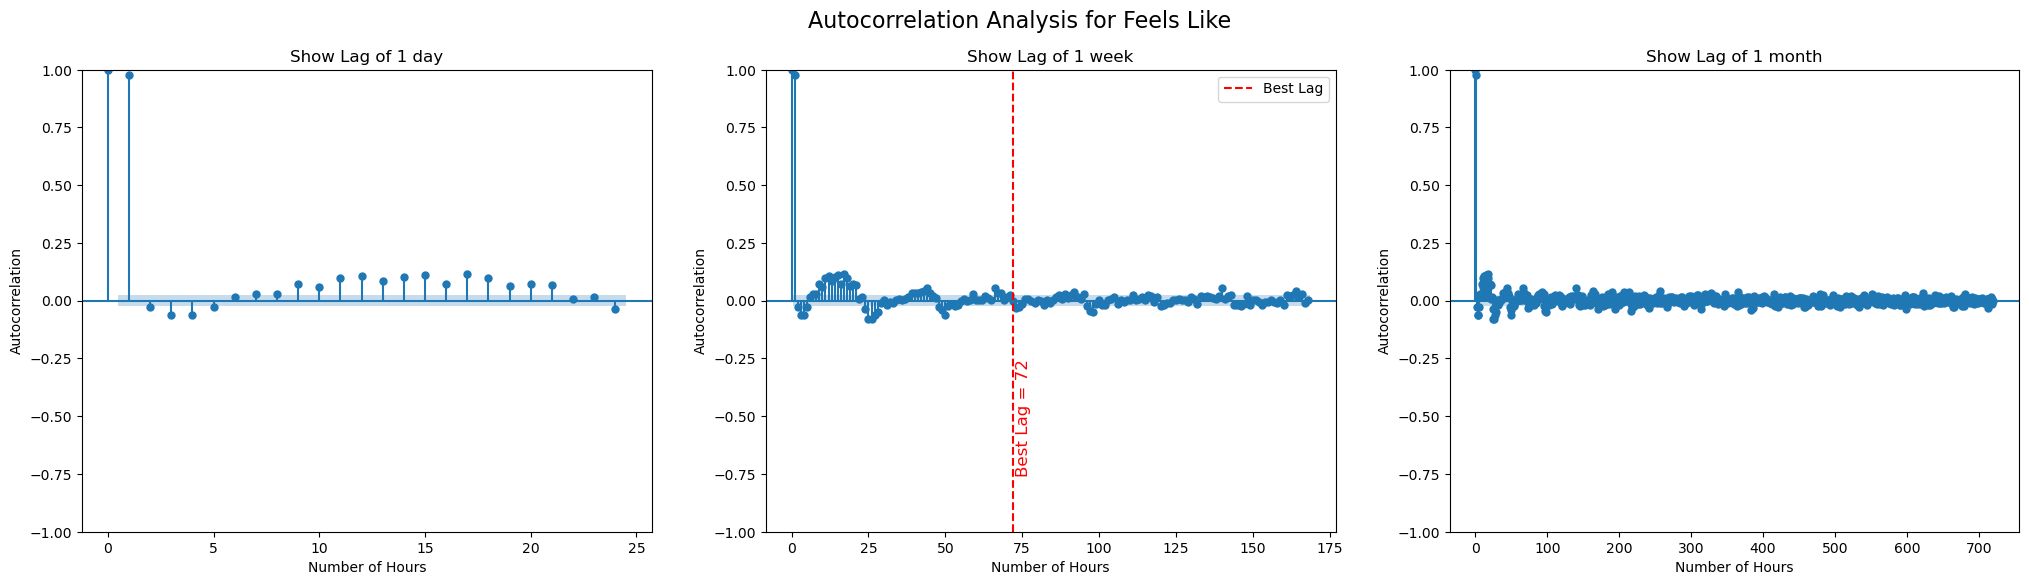

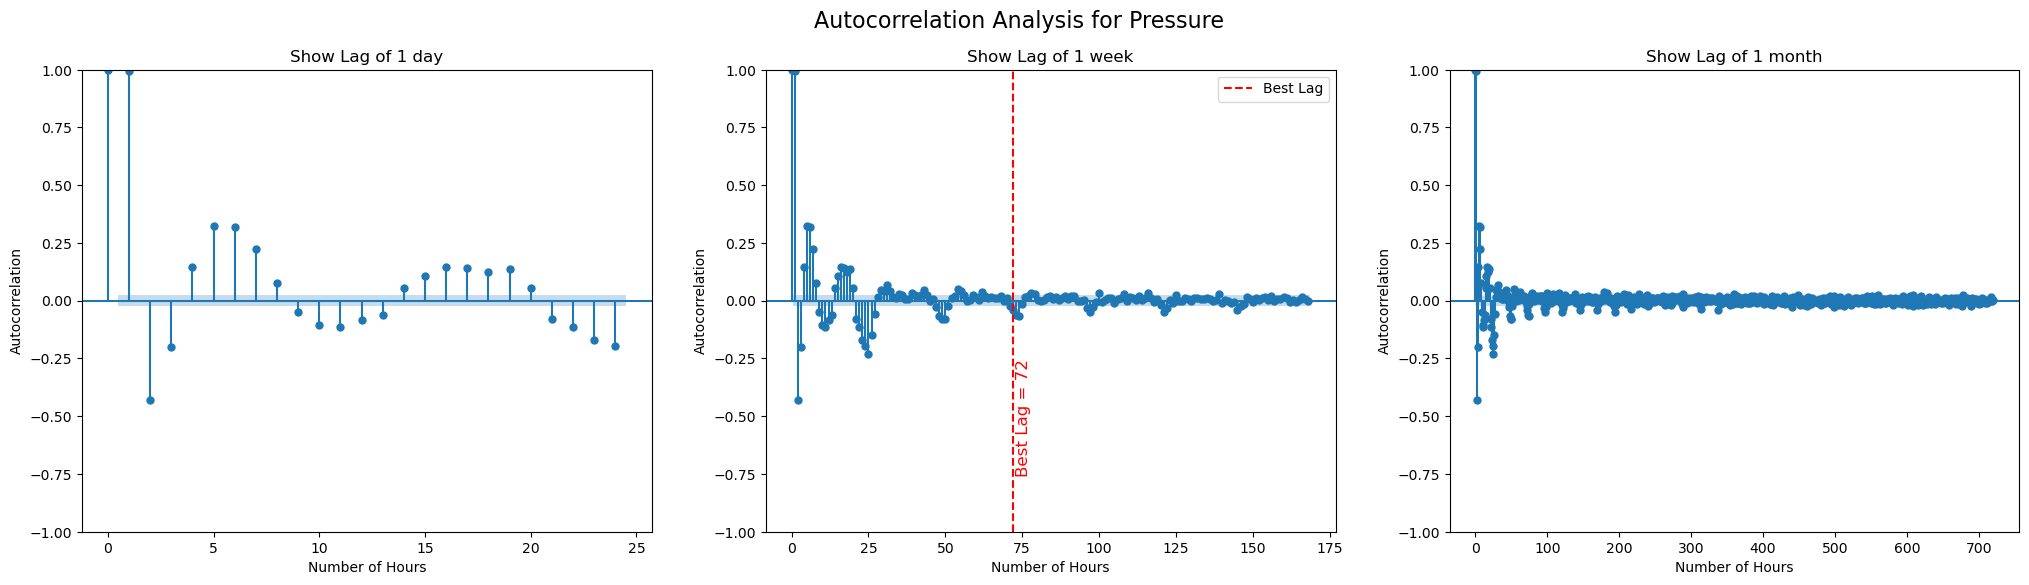

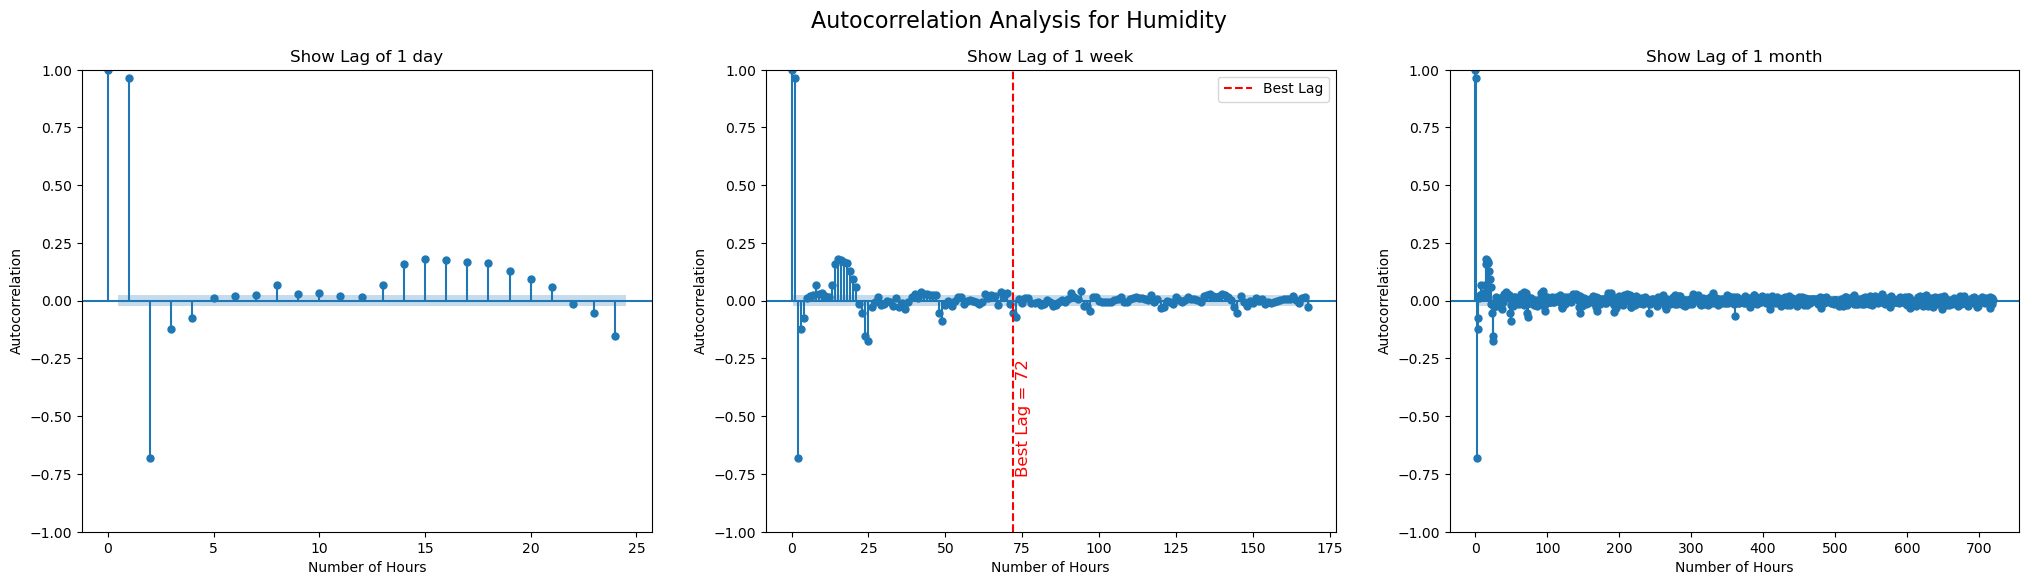

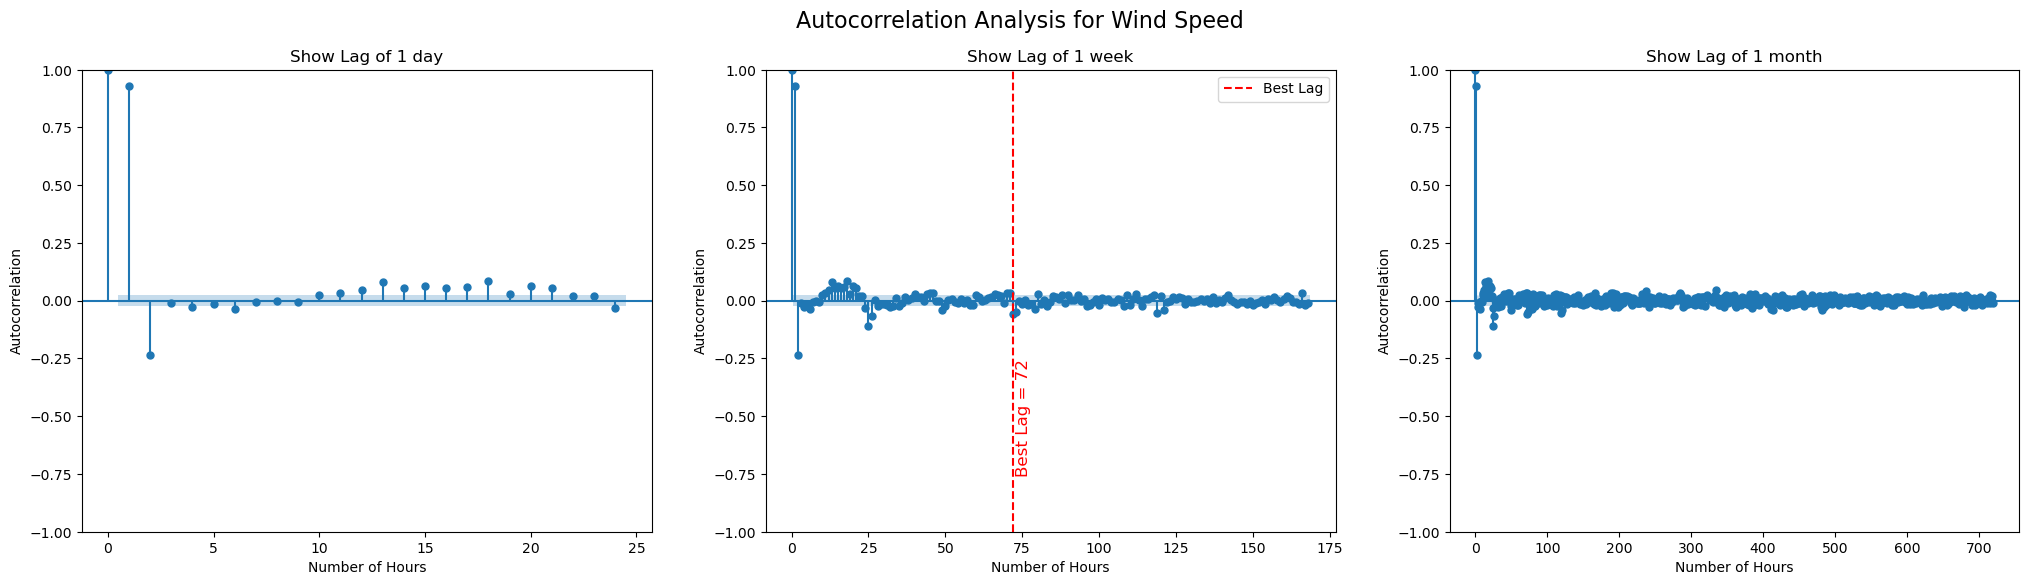

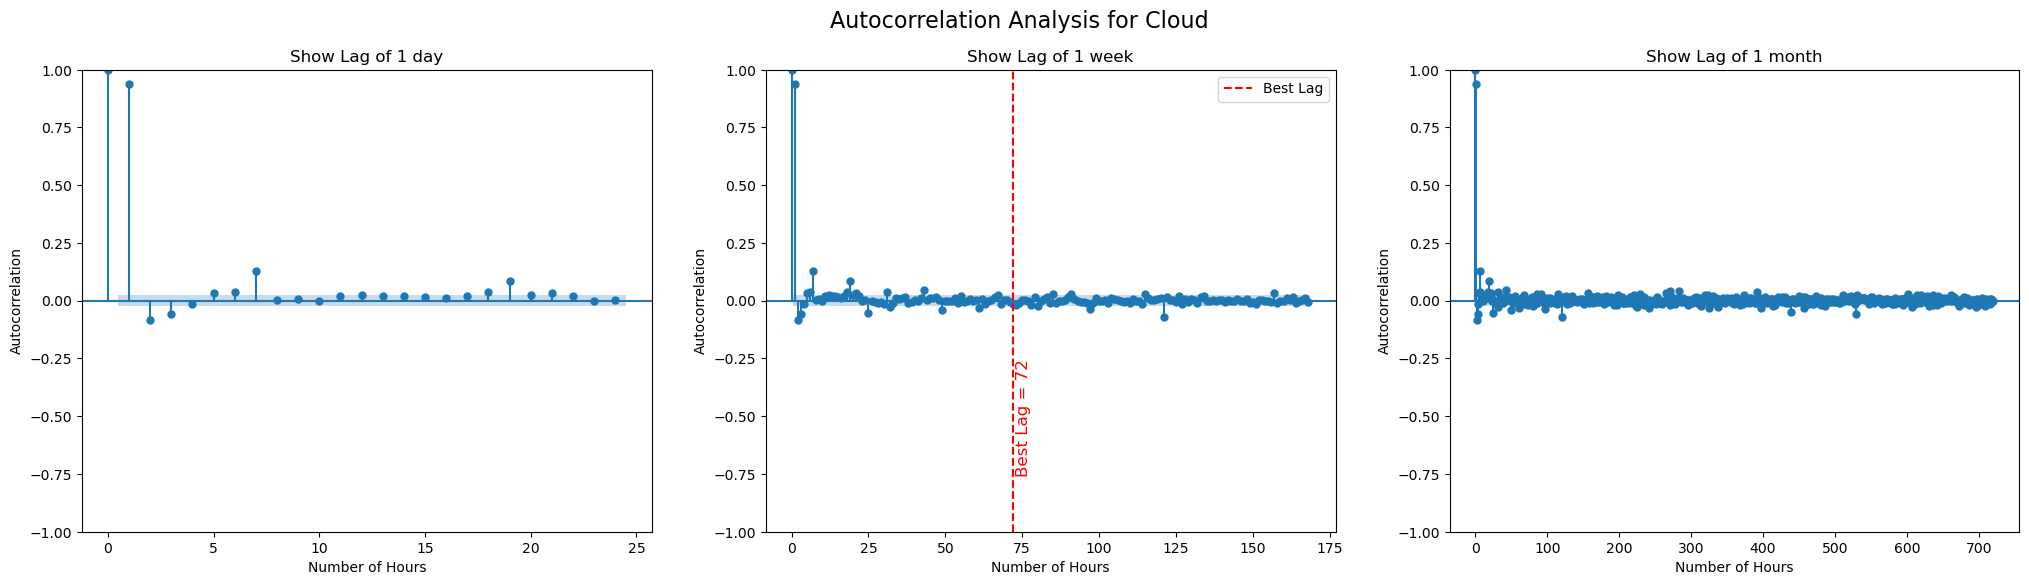

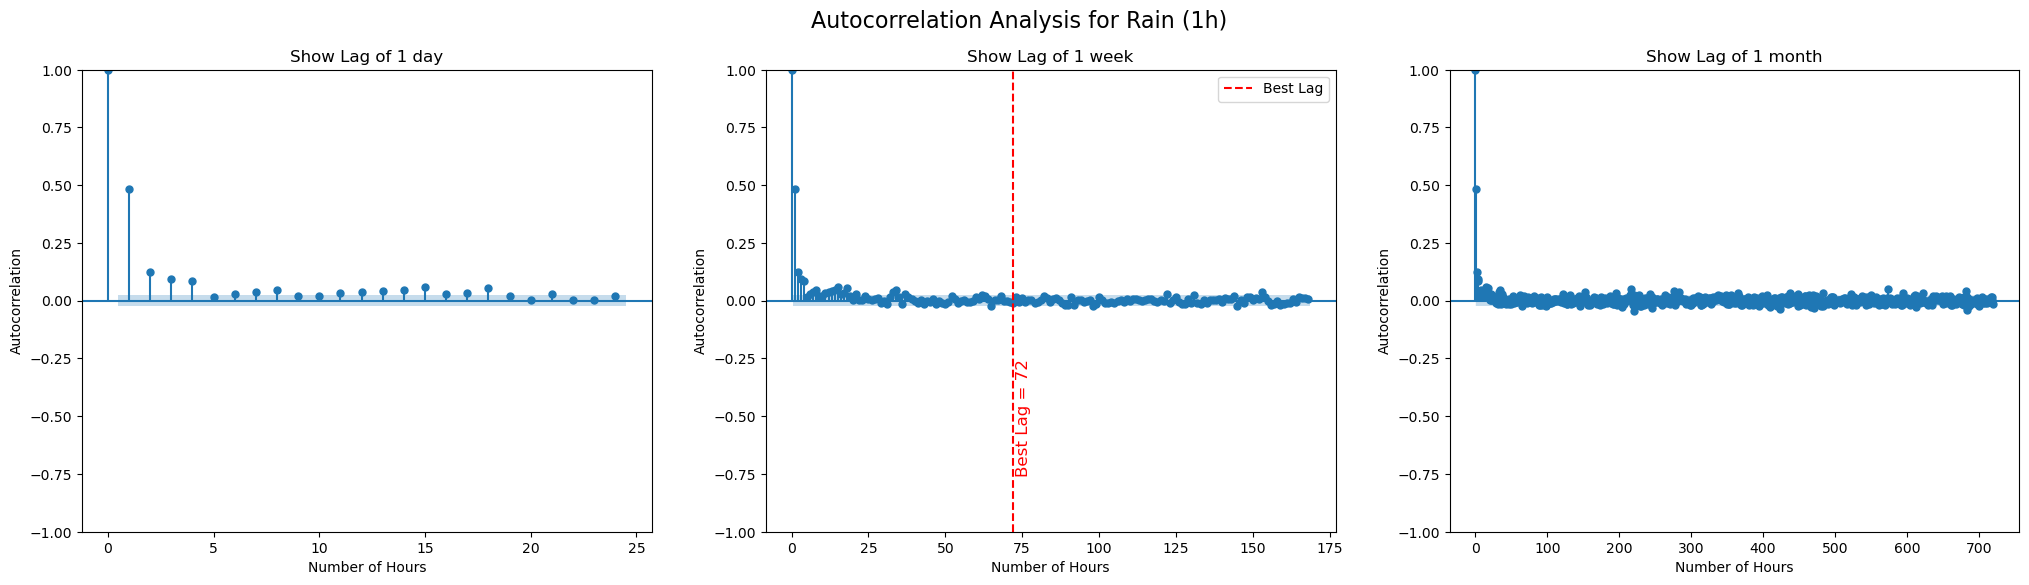

In [25]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


for col in df_pacf.columns:
    fig, ax = plt.subplots(nrows= 1, ncols= 3, figsize= (25, 6))

    fig.suptitle(f"Autocorrelation Analysis for {col}", fontsize=16)
    
    plot_pacf(df_pacf[col], lags = 24, ax= ax[0]) # Lags within 24 hours
    ax[0].set_title("Show Lag of 1 day")

    plot_pacf(df_pacf[col], lags = 24*7, ax= ax[1]) # Lags within a week
    ax[1].set_title("Show Lag of 1 week")
    ax[1].axvline(x=72, color='red', linestyle='--', label=f'Best Lag')
    ax[1].legend()

    # acf_values = acf(df_pacf[col], nlags=24*7)
    ax[1].text(73, -0.75, f'Best Lag = 72', color='red', fontsize=12, ha='left', rotation = 90)  # Adjust positioning

    plot_pacf(df_pacf[col], lags = 24*30, ax= ax[2]) # Lags within a month
    ax[2].set_title("Show Lag of 1 month")

    for i in range(3):
        ax[i].set_xlabel("Number of Hours")
        ax[i].set_ylabel("Autocorrelation")
plt.show()

# ARIMA model

In [26]:
df_model = df_pacf["Temperature"]
df_model

TimeStamp
2024-01-01 00:00:00    292.15
2024-01-01 01:00:00    293.15
2024-01-01 02:00:00    294.15
2024-01-01 03:00:00    297.15
2024-01-01 04:00:00    299.15
                        ...  
2024-11-05 13:00:00    295.15
2024-11-05 14:00:00    295.15
2024-11-05 15:00:00    295.15
2024-11-05 16:00:00    295.15
2024-11-05 17:00:00    295.15
Freq: h, Name: Temperature, Length: 7434, dtype: float64